In [66]:
import pickle
import numpy as np
import matplotlib.pyplot as plt 


def get_pickle_data(filename):
    
    objects = []
    with (open(filename, 'rb')) as openfile:
        while True:
            try:
                objects.append(pickle.load(openfile))
            except EOFError:
                break
                
    if len(objects) == 1:
        return objects[0]
    
    return objects


def plot(data, metric, param, axes):
    
    _x = range(len(data[metric][0]))
    _y = data[metric]

    # set axes
    plt.xlabel(axes['xname'], fontsize=16)
    plt.ylabel(axes['yname'], fontsize=16)
        
    plt.xlim([axes['xmin'],axes['xmax']+300])
    plt.ylim([axes['ymin'],axes['ymax']])
    
    plt.xticks(np.arange(axes['xmin'],axes['xmax']+0.001, step=axes['xstep']))
    plt.yticks(np.arange(axes['ymin'],axes['ymax']+0.001, step=axes['ystep']))
    
    if axes['amount'] > 1:
        if axes['idx'] == 0:
            ax[axes['idx']].spines['top'].set_visible(False)
        ax[axes['idx']].spines['right'].set_visible(False)
    else:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    for i in range(param['num_values']):
        
        param_value = param['min'] + i*(param['max']-param['min'])/(param['num_values']-1)
        param_value = round(param_value, 2)
        
        x = _x[axes['xmin']:axes['xmax']]
        y = _y[i][axes['xmin']:axes['xmax']]

        if axes['amount'] > 1:
            ax[axes['idx']].plot(x, y, linewidth=2.0)
            # annotate parameter value
            ax[axes['idx']].annotate(f"{param_value}", xy=(_x[axes['xmax']], _y[i][axes['xmax']]))
        else:
            ax.plot(x, y, linewidth=2.0)
            # annotate parameter value
            ax.annotate(f"{param_value}", xy=(_x[axes['xmax']], _y[i][axes['xmax']]), fontsize=7)



############# INFO ###############

filenames = [
    'results/erdos100_d_005_035_30_15.pickle',
    'results/erdos100_mu_005_05_20_20_d_015.pickle',
    'results/erdos1000_d_005_035_10_15.pickle',
    'results/erdos1000_mu_005_05_10_20_d_015.pickle']

metrics = ['c_1_avgs', 'c1_vars', 'x_hat_avgs', 'x_hat_vars']

##################################

########## PLOT CONFIG ###########

# set plot size and resolution
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

##################################

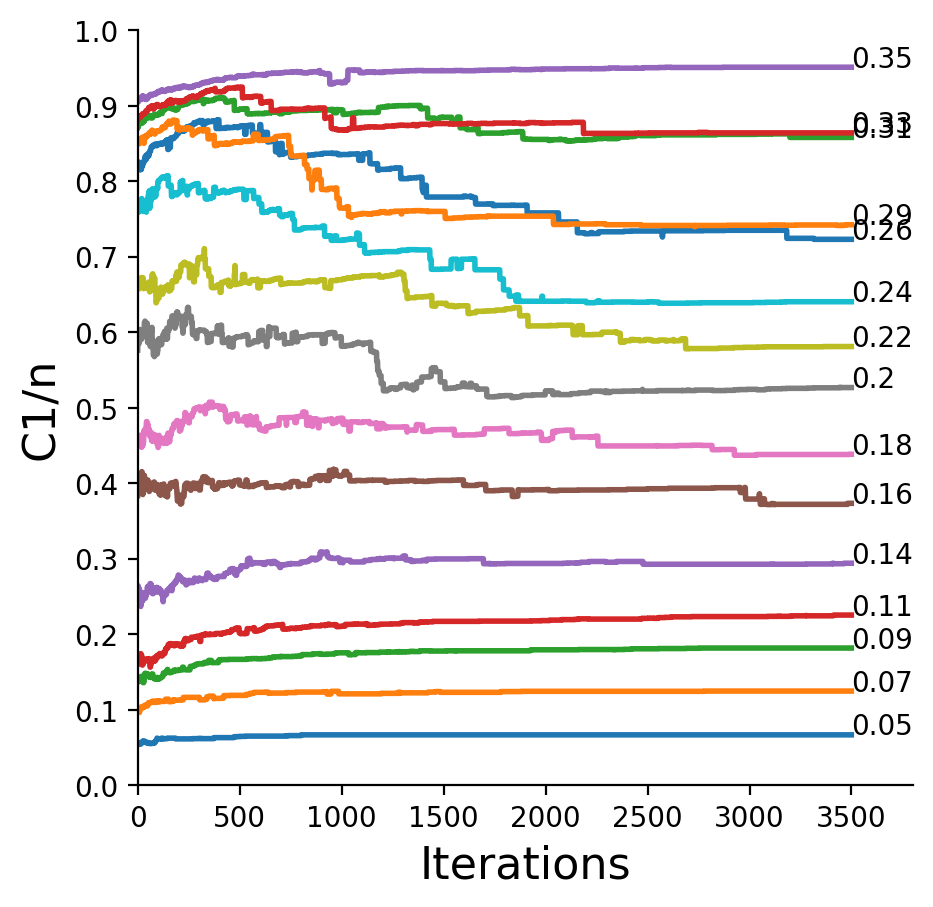

In [34]:
#### C1 PLOT N=100

# set plot size and resolution
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

file = 'results/erdos100_d_005_035_30_15.pickle'
data = get_pickle_data(file)

metric = 'c_1_avgs'

param = {'name': 'd',
         'num_values': 15,
         'min': 0.05,
         'max': 0.35}

axes = {'xmin': 0,
        'xmax': 3500,
        'xstep': 500,
        'ymin': 0,
        'ymax': 1,
        'ystep': 0.1,
        'xname': 'Iterations',
        'yname': 'C1/n'
       }

fig, ax = plt.subplots(1, 1, sharex=True)
fig.subplots_adjust(hspace=0)

axes['idx'] = 0
axes['amount'] = 1

plot(data, metric, param, axes)

plt.show()

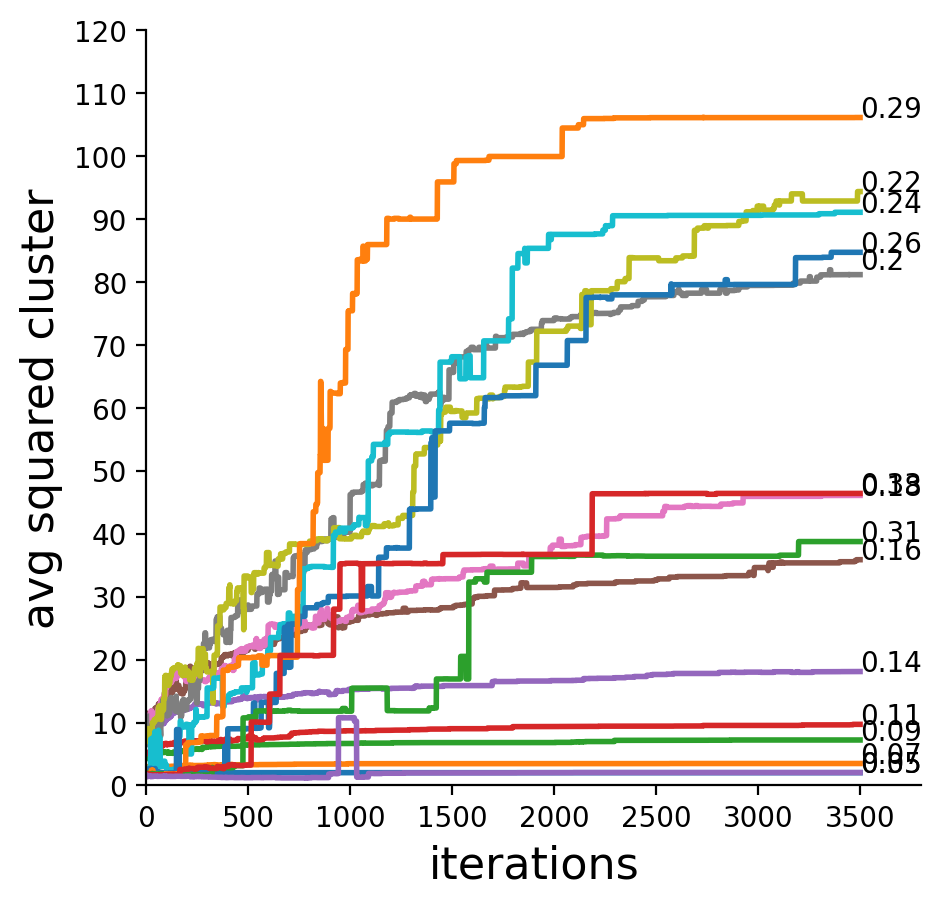

In [35]:
#### X HAT PLOT N=100

# set plot size and resolution
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

file = 'results/erdos100_d_005_035_30_15.pickle'
data = get_pickle_data(file)

metric = 'x_hat_avgs'

param = {'name': 'd',
         'num_values': 15,
         'min': 0.05,
         'max': 0.35}

axes = {'xmin': 0,
        'xmax': 3500,
        'xstep': 500,
        'ymin': 0,
        'ymax': 120,
        'ystep': 10,
        'xname': 'iterations',
        'yname': 'avg squared cluster'
       }

fig, ax = plt.subplots(1, 1, sharex=True)
fig.subplots_adjust(hspace=0)

axes['idx'] = 0
axes['amount'] = 1

plot(data, metric, param, axes)

plt.show()

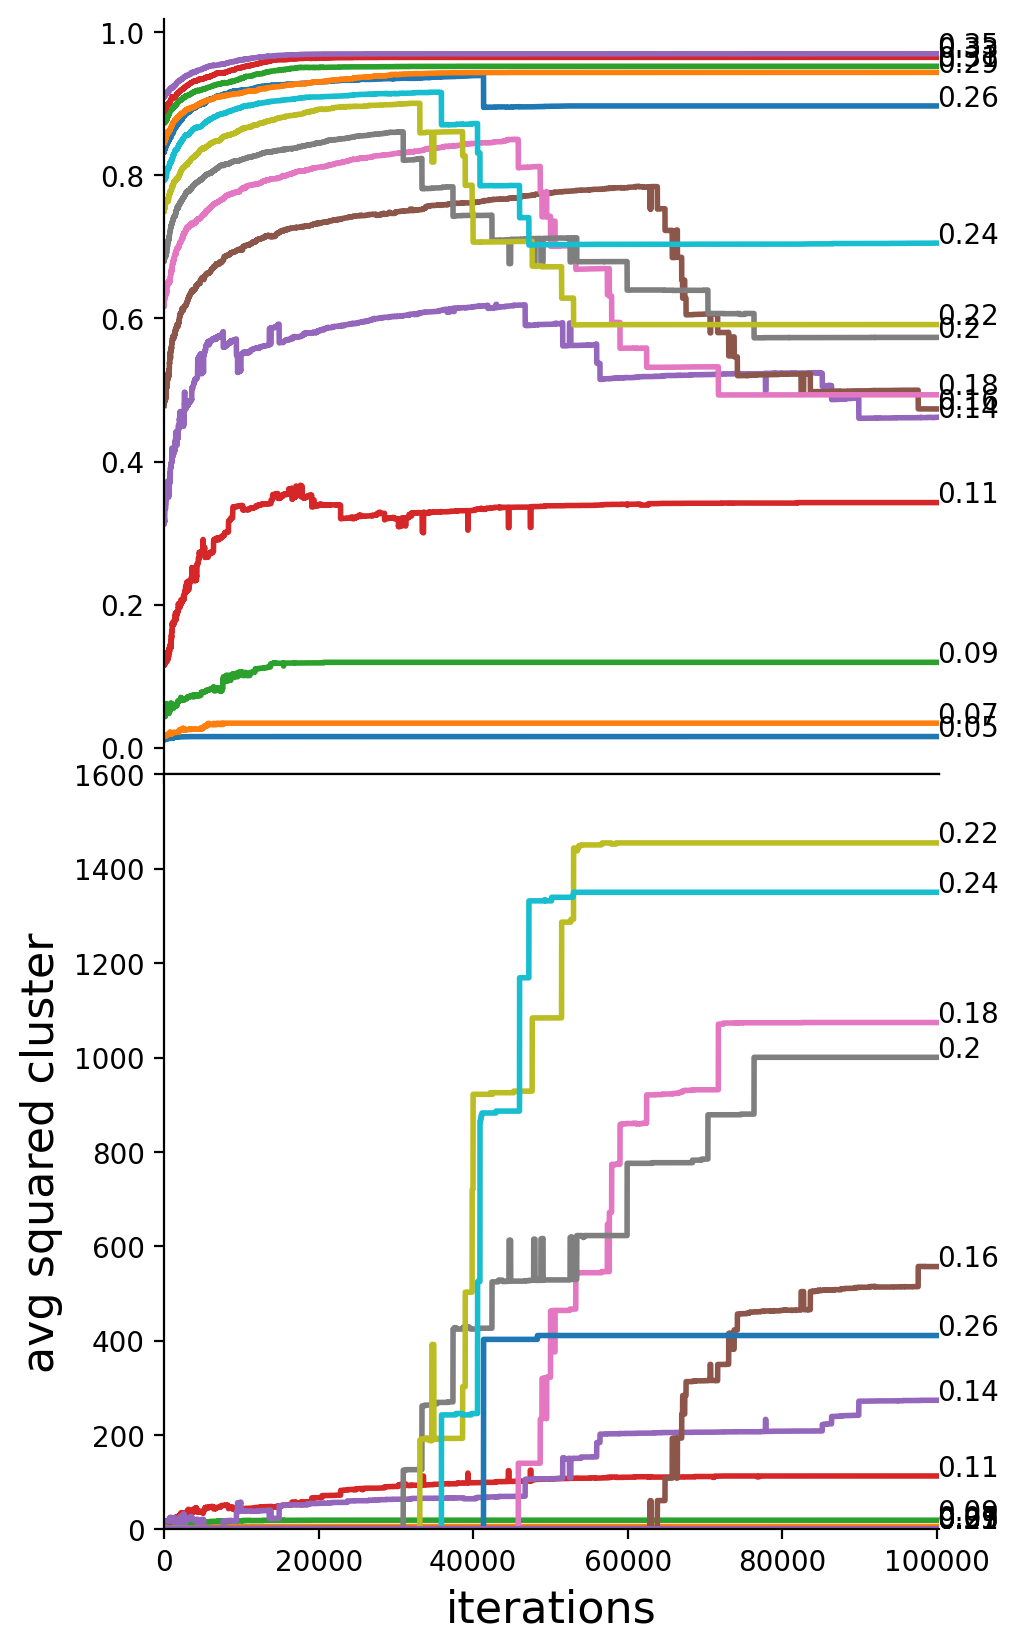

In [36]:
#### C1 VS XHAT PLOT N = 1000

# set plot size and resolution
plt.rcParams['figure.figsize'] = [5, 10]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

file = 'results/erdos1000_d_005_035_10_15.pickle'
data = get_pickle_data(file)

metric = 'c_1_avgs'

param = {'name': 'd',
         'num_values': 15,
         'min': 0.05,
         'max': 0.35}

axes = {'xmin': 0,
        'xmax': 100_000,
        'xstep': 20000,
        'ymin': 0,
        'ymax': 1,
        'ystep': 0.1,
        'xname': 'iterations',
        'yname': 'C1/N'
       }

axes['amount'] = 2
fig, ax = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0)

axes['idx'] = 0
plot(data, metric, param, axes)

metric = 'x_hat_avgs'
axes['ymax'] = 1600
axes['ystep'] = 200
axes['yname'] = 'avg squared cluster'

axes['idx'] += 1
plot(data, metric, param, axes)

plt.show()

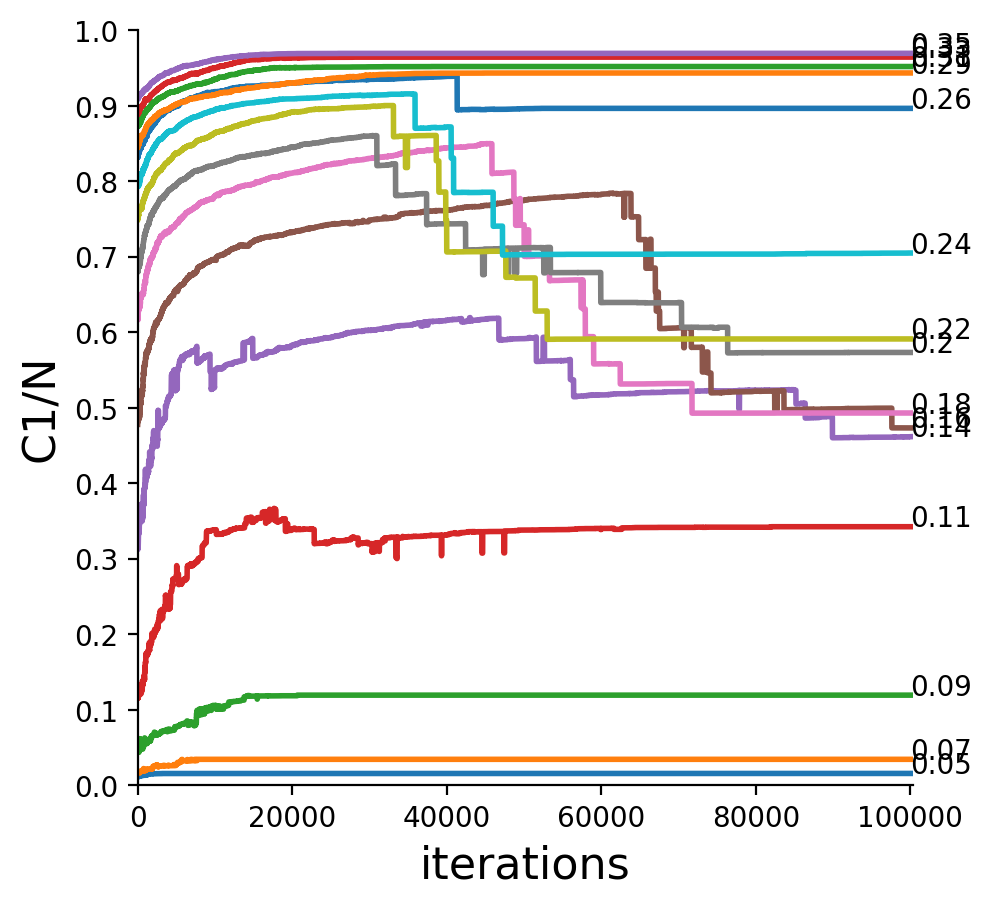

In [37]:
#### C1 PLOT N = 1000

# set plot size and resolution
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

file = 'results/erdos1000_d_005_035_10_15.pickle'
data = get_pickle_data(file)

metric = 'c_1_avgs'

param = {'name': 'd',
         'num_values': 15,
         'min': 0.05,
         'max': 0.35}

axes = {'xmin': 0,
        'xmax': 100_000,
        'xstep': 20000,
        'ymin': 0,
        'ymax': 1,
        'ystep': 0.1,
        'xname': 'iterations',
        'yname': 'C1/N'
       }

fig, ax = plt.subplots(1, 1, sharex=True)
fig.subplots_adjust(hspace=0)

axes['idx'] = 0
axes['amount'] = 1

plot(data, metric, param, axes)

plt.show()

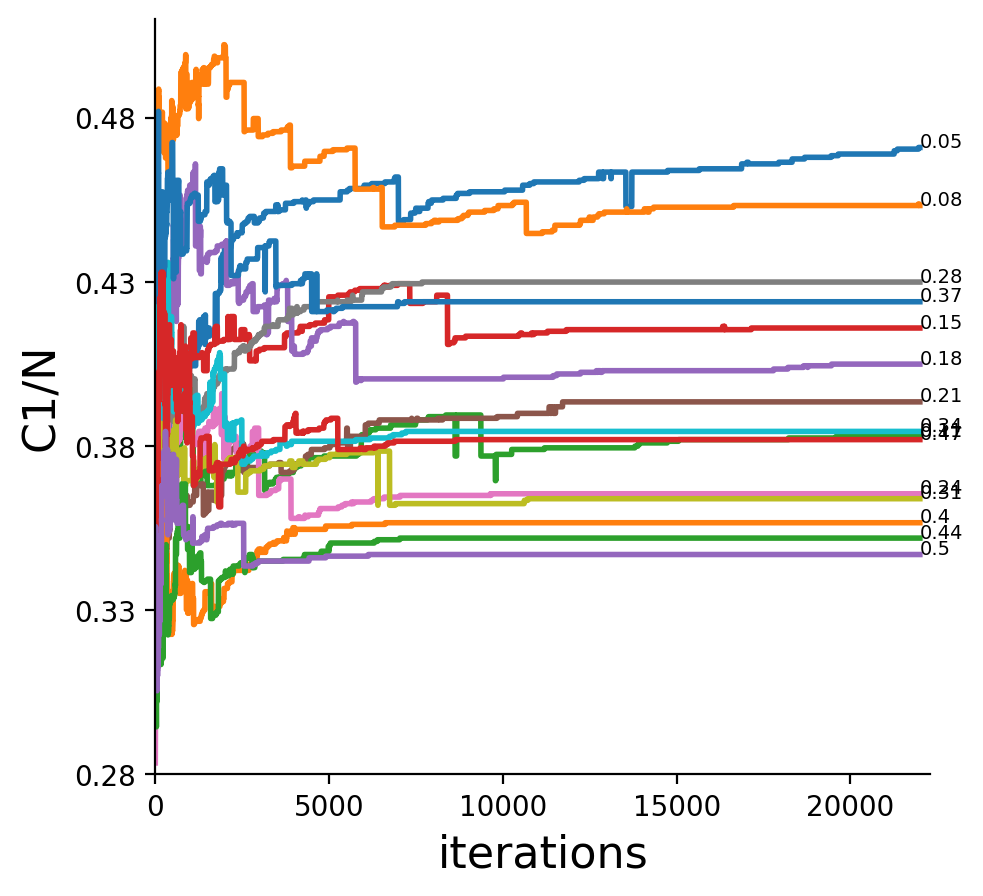

In [68]:
#### C1         MU N=100

# set plot size and resolution
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

file = 'results/erdos100_mu_005_05_20_20_d_015.pickle'
data = get_pickle_data(file)

metric = 'c_1_avgs'

param = {'name': 'mu',
         'num_values': 15,
         'min': 0.05,
         'max': 0.5}

axes = {'xmin': 0,
        'xmax': 22000,
        'xstep': 5000,
        'ymin': 0.28,
        'ymax': 0.51,
        'ystep': 0.05,
        'xname': 'iterations',
        'yname': 'C1/N'
       }

fig, ax = plt.subplots(1, 1, sharex=True)
fig.subplots_adjust(hspace=0)

axes['idx'] = 0
axes['amount'] = 1

plot(data, metric, param, axes)

plt.show()

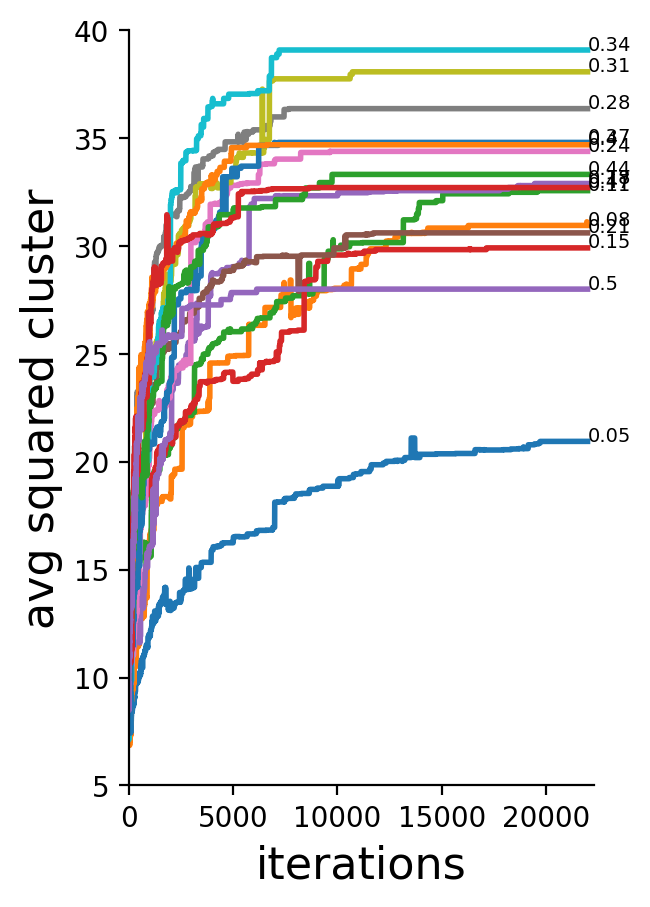

In [67]:
#### xhat        MU N=100

# set plot size and resolution
plt.rcParams['figure.figsize'] = [3, 5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

file = 'results/erdos100_mu_005_05_20_20_d_015.pickle'
data = get_pickle_data(file)

metric = 'x_hat_avgs'

param = {'name': 'mu',
         'num_values': 15,
         'min': 0.05,
         'max': 0.5}

axes = {'xmin': 0,
        'xmax': 22000,
        'xstep': 5000,
        'ymin': 5,
        'ymax': 40,
        'ystep': 5,
        'xname': 'iterations',
        'yname': 'avg squared cluster'
       }

fig, ax = plt.subplots(1, 1, sharex=True)
fig.subplots_adjust(hspace=0)

axes['idx'] = 0
axes['amount'] = 1

plot(data, metric, param, axes)

plt.show()

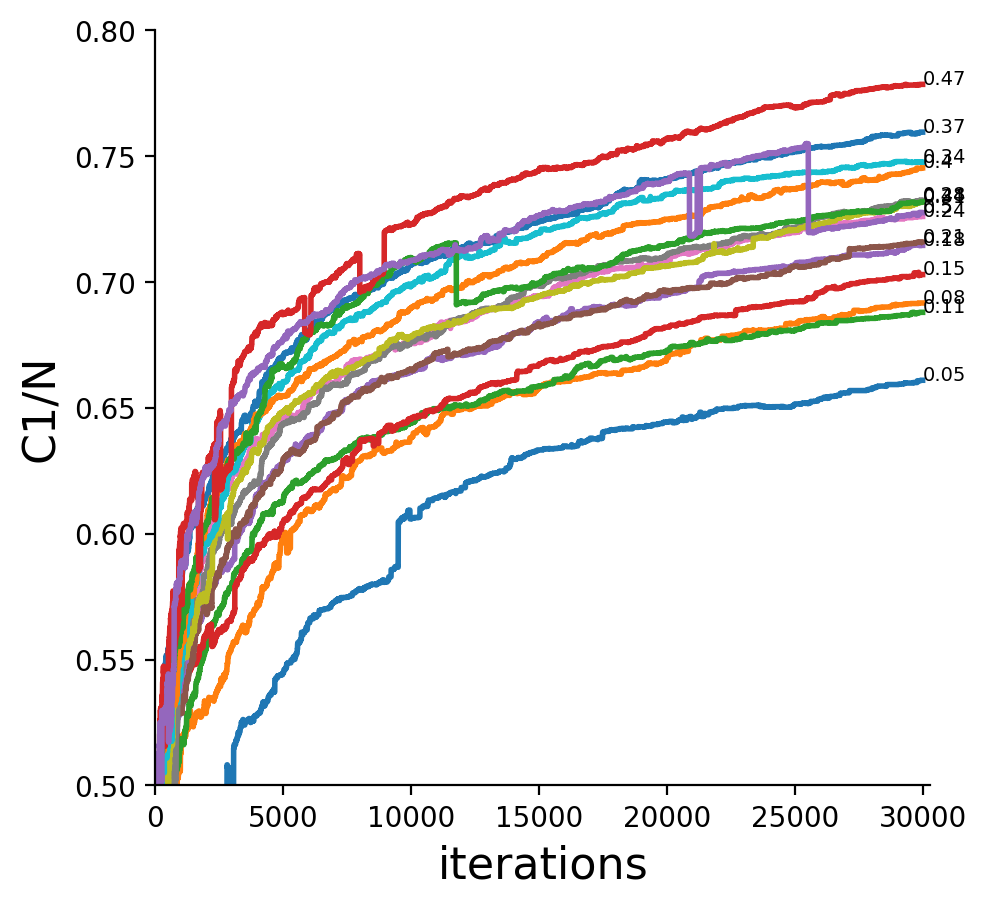

In [85]:
#### C1 MU N = 1000

# set plot size and resolution
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

file = 'results/erdos1000_mu_005_05_10_20_d_015.pickle'
data = get_pickle_data(file)

metric = 'c_1_avgs'

param = {'name': 'd',
         'num_values': 15,
         'min': 0.05,
         'max': 0.5}

axes = {'xmin': 0,
        'xmax': 30_000,
        'xstep': 5000,
        'ymin': 0.5,
        'ymax': 0.8,
        'ystep': 0.05,
        'xname': 'iterations',
        'yname': 'C1/N'
       }

fig, ax = plt.subplots(1, 1, sharex=True)
fig.subplots_adjust(hspace=0)

axes['idx'] = 0
axes['amount'] = 1

plot(data, metric, param, axes)

plt.show()

In [213]:
print(type(objects[0]))
print(objects[0].keys())

print(len(objects[0]['c_1_avgs']))
print(len(objects[0]['c_1_avgs'][0]))

<class 'dict'>
dict_keys(['c_1_avgs', 'c1_vars', 'x_hat_avgs', 'x_hat_vars'])
15
250000
